In [51]:
import sklearn as sk
import numpy as np
import pylab as pl
import pandas as pd
import scipy
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score
from pandas.plotting import bootstrap_plot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [52]:
energydata_complete = pd.read_csv('energydata_complete.csv')

1.	Изучить набор данных.

Appliances, потребление энергии в Wh
lights, потребление энергии светильников в доме в Wh
T1, Температура в кухонной зоне, в градусах Цельсия
RH_1, Влажность в кухонной зоне, в %
T2, Температура в зоне гостиной, в градусах Цельсия
RH_2, Влажность в зоне гостиной, в %
T3, Температура в зоне прачечной
RH_3, Влажность в зоне прачечной, в %
T4, Температура в офисном помещении, в градусах Цельсия
RH_4, Влажность в офисном помещении, в %
T5, Температура в ванной комнате, в градусах Цельсия
RH_5, Влажность в ванной комнате, в %
T6, Температура снаружи здания (северная сторона), в градусах Цельсия
RH_6, Влажность за пределами здания (северная сторона), в %
T7, Температура в гладильной комнате , в градусах Цельсия
RH_7, Влажность в гладильной комнате, в %
T8, Температура в комнате для подростков 2, в градусах Цельсия
RH_8, Влажность в комнате для подростков 2, в %
T9, Температура в комнате родителей, в градусах Цельсия
RH_9, Влажность в родительской комнате, в %
To, Температура снаружи (от метеостанции Кьевр), в градусах Цельсия
Давление (от метеостанции Кьевр), в мм рт. ст.
RH_out, Влажность снаружи (от метеостанции Кьевр), в %
Wind speed (от метеостанции Кьевр), м/с
Visibility (от метеостанции Кьевр), в км
Tdewpoint (от метеостанции Кьевр), ° C
rv1, Случайная величина 1, безразмерная
rv2, Случайная величина 2, безразмерная

2.	Удалите дубликаты строк в наборе данных;

In [53]:
print(energydata_complete.shape[0])#удаление дубликатов
energydata_complete = energydata_complete.drop_duplicates()
print(energydata_complete.shape[0])

19735
19735


3.	Выполните масштабирование количественных признаков; 

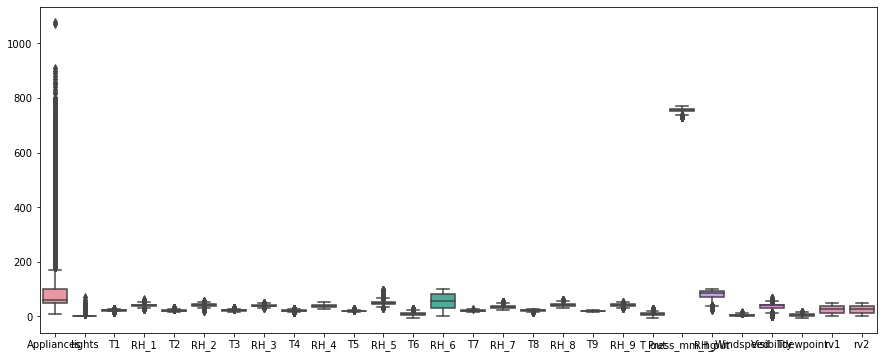

In [54]:
numerical_columns = [i for i in energydata_complete.columns if energydata_complete[i].dtype.name != 'object']
plt.figure(figsize=(15,6))
sns.boxplot(data=energydata_complete[numerical_columns])
plt.show()

In [55]:

numerical_columns = [i for i in energydata_complete.columns if energydata_complete[i].dtype.name != 'object']
scaler = MinMaxScaler()
energydata_complete[numerical_columns] = scaler.fit_transform(energydata_complete[numerical_columns])

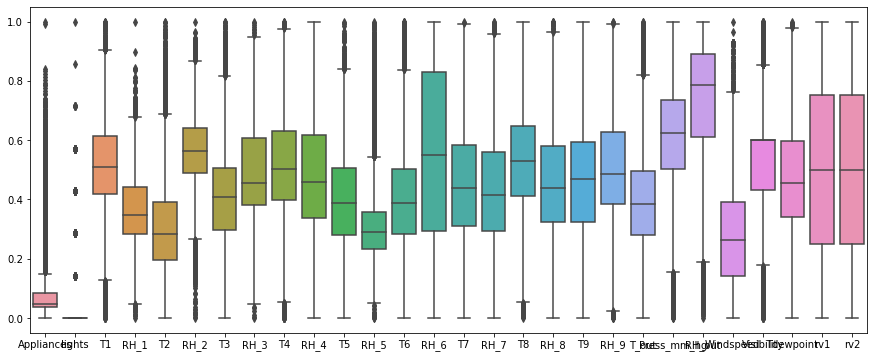

In [56]:
plt.figure(figsize=(15,6))
sns.boxplot(data=energydata_complete[numerical_columns])
plt.show()

4.	Выполните замену категориальных признаков; 

5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

<AxesSubplot:>

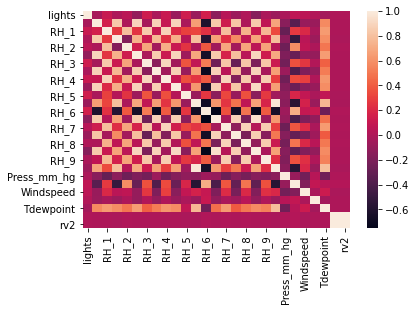

In [57]:
sns.heatmap(energydata_complete.iloc[:, 2:].corr())

In [58]:
# energydata_complete[:] = energydata_complete.groupby("Appliances").transform(lambda x:x.fillna(x.mean()))
del energydata_complete["date"]

6.	Заполните пропущенные значения в данных;

In [59]:
energydata_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  float64
 1   lights       19735 non-null  float64
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

7.	Решите поставленную задачу регрессии в соответствии с заданием. 

In [60]:
X, y = energydata_complete.drop(['Appliances'], axis=1), energydata_complete['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

2 – линейная регрессия, LASSO регуляризатор;

In [61]:
lasso = linear_model.Lasso (alpha = 0.5)
lasso.fit(X_train,y_train)
pred_lasso = lasso.predict(X_test)
print(pred_lasso[:15] - y_test[:15])

9258     0.026180
10439    0.044872
16471    0.044872
7718     0.044872
19622    0.035526
13957   -0.001857
7630    -0.142044
5062    -0.001857
10238   -0.001857
3922     0.035526
7900     0.016834
10030   -0.254194
2945     0.035526
7068    -0.011203
6201    -0.188773
Name: Appliances, dtype: float64


In [62]:
lasso.coef_

array([ 0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0., -0.,
       -0.])

In [63]:
lasso.intercept_

0.08225503315747669

In [64]:
corr={}
corr['pearson'], _ = pearsonr(pred_lasso,y_test)
corr['spearman'], _ = spearmanr(pred_lasso,y_test)
print('Корреляция Пирсона: ', corr['pearson'])
print('Корреляция Спирмена: ', corr['spearman'])

Корреляция Пирсона:  nan
Корреляция Спирмена:  nan


D:\programs\WPy64-3910\python-3.9.1.amd64\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
D:\programs\WPy64-3910\python-3.9.1.amd64\lib\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


3 – линейная регрессия, RIDGE регуляризатор;

In [65]:
regr = linear_model.Ridge (alpha = 0.5)
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:16] - y_test[:16])

9258     0.014774
10439    0.005928
16471    0.015346
7718     0.008244
19622    0.063485
13957    0.019356
7630    -0.097207
5062     0.057865
10238    0.110035
3922     0.087428
7900    -0.008922
10030   -0.289672
2945     0.023239
7068     0.122128
6201    -0.147397
19549    0.072314
Name: Appliances, dtype: float64


In [66]:
regr.coef_

array([ 0.13596216, -0.01440183,  0.46948885, -0.18993225, -0.39879175,
        0.28528141,  0.09586826, -0.04787345,  0.00191007, -0.00546011,
        0.00828056,  0.19627423,  0.02194293,  0.0282098 , -0.04949147,
        0.07261579, -0.12374875, -0.14357186, -0.02076725, -0.23603179,
        0.00442007, -0.05666123,  0.02183442,  0.01043677,  0.07680735,
       -0.00069605, -0.00069605])

In [67]:
regr.intercept_

0.149934006248663

In [68]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('Корреляция Пирсона: ', corr['pearson'])
print('Корреляция Спирмена: ', corr['spearman'])

Корреляция Пирсона:  0.40475318820965484
Корреляция Спирмена:  0.5189374052678273
